In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind, fisher_exact
from scipy.stats.contingency import odds_ratio
import itertools as it
from collections import Counter
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages
from functools import reduce
from scipy.stats import kstest,ttest_ind

In [2]:
phenotype_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/train_cohort_bmi.csv.gz"
combo_files = [
    "/data6/deepro/ukb_bmi/3_characterization/data/combo_info/british/discovery_combo2.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/combo_info/british/discovery_combo3.csv"
]

phenotype_df = pd.read_csv(phenotype_file, usecols=["sample_names", "bmi", "bmi_prs"])
combo_df = pd.concat([pd.read_csv(cf) for cf in combo_files])
all_combo_samples = set("|".join(combo_df.combo_samples.values).split("|"))


In [3]:
phenotype_combo_samples_df = phenotype_df.loc[phenotype_df.sample_names.astype(str).isin(list(map(str, all_combo_samples)))]
phenotype_other_samples_df = phenotype_df.loc[~phenotype_df.sample_names.astype(str).isin(list(map(str, all_combo_samples)))]

phenotype_other_samples_df["description"] = "Non Combo"
phenotype_combo_samples_df["description"] = "Combo"
phenotype_samples_df = pd.concat((phenotype_combo_samples_df, phenotype_other_samples_df))

/tmp/ipykernel_90660/112422977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenotype_other_samples_df["description"] = "Non Combo"
/tmp/ipykernel_90660/112422977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenotype_combo_samples_df["description"] = "Combo"


In [4]:
phenotype_samples_df

,sample_names,bmi_prs,bmi,description
22,1001090,0.537263,27.5551,Combo
110,1005637,-0.280427,26.2897,Combo
118,1006065,0.903266,49.9817,Combo
154,1007953,0.161748,30.6831,Combo
162,1008528,1.294230,27.0552,Combo
...,...,...,...,...
427633,6024818,-0.416108,27.6095,Non Combo
427634,6024948,0.321514,47.2208,Non Combo
427636,6025119,0.968325,30.0759,Non Combo
427637,6025181,-0.119517,26.4991,Non Combo


In [5]:
phenotype_samples_df.loc[phenotype_samples_df.description=="Non Combo", "bmi_prs"].mean()

-0.2113454277180635

In [6]:
phenotype_samples_df.loc[phenotype_samples_df.description=="Combo", "bmi_prs"].describe()

count    10193.000000
mean        -0.157903
std          0.995045
min         -3.997840
25%         -0.822225
50%         -0.165892
75%          0.513074
max          3.823600
Name: bmi_prs, dtype: float64

In [7]:
phenotype_samples_df.loc[phenotype_samples_df.description=="Non Combo", "bmi_prs"].describe()

count    417446.000000
mean         -0.211345
std           0.976805
min          -4.709030
25%          -0.871008
50%          -0.211110
75%           0.446872
max           4.164230
Name: bmi_prs, dtype: float64

<AxesSubplot: xlabel='bmi_prs', ylabel='Density'>

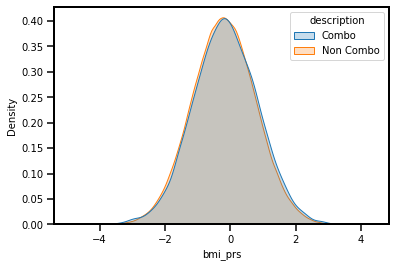

In [8]:
sns.kdeplot(phenotype_samples_df, x="bmi_prs", hue="description", fill=True, common_norm=False)

(-3.5, 3.5)

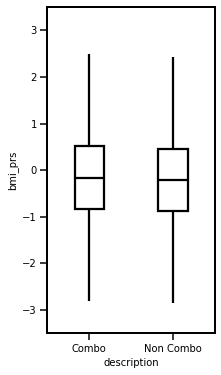

In [9]:
fig,ax = plt.subplots(figsize=(3, 6))

# Box Plot
sns_ax = sns.boxplot(
    data=phenotype_samples_df,
    # palette=["#c1272d", "#00ADEE"],  # "#eecc16", "#008176" '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    x="description",
    y="bmi_prs",
    color="k",
    orient="v",
    legend=False,
    width=0.35, linewidth=2.25, fliersize=0, capprops={'color':'none'}, boxprops={'facecolor':'none', 'edgecolor':'k'}
    )

ax.set_ylim((-3.5, 3.5))

In [10]:
ttest_ind(
    phenotype_samples_df.loc[phenotype_samples_df.description=="Non Combo", "bmi_prs"],
    phenotype_samples_df.loc[phenotype_samples_df.description=="Combo", "bmi_prs"].mean()
)

TtestResult(statistic=-0.05471114350862153, pvalue=0.9563686176074011, df=417445.0)